<a href="https://colab.research.google.com/github/PrathyushaMyla2005/google-colab/blob/main/Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
  !pip install numpy pandas matplotlib seaborn scikit-learn statsmodels openpyxl xlrd plotly scipy


In [ ]:
from sklearn.datasets import load_iris

dataset = load_diabetes()
print(dataset['DESCR'])   # <-- note: uppercase 'DESCR'


.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [ ]:
import pandas as pd
df_diabetes = pd.DataFrame(dataset['data'], columns=['age','sex','bmi','bp','s1','s2','s3','s4','s5','s6'])
df_diabetes.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [ ]:
#independent  and dependent features
x=df_diabetes
y=dataset['target']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
x_train.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
17,0.070769,0.050680,0.012117,0.056301,0.034206,0.049416,-0.039719,0.034309,0.027364,-0.001078
66,-0.009147,0.050680,-0.018062,-0.033213,-0.020832,0.012152,-0.072854,0.071210,0.000272,0.019633
137,0.005383,-0.044642,0.049840,0.097615,-0.015328,-0.016345,-0.006584,-0.002592,0.017036,-0.013504
245,-0.027310,-0.044642,-0.035307,-0.029770,-0.056607,-0.058620,0.030232,-0.039493,-0.049872,-0.129483
31,-0.023677,-0.044642,-0.065486,-0.081413,-0.038720,-0.053610,0.059685,-0.076395,-0.037129,-0.042499


In [ ]:
#correlation
x_train.corr()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
age,1.000000,0.171161,0.184695,0.314569,0.270283,0.218952,-0.043783,0.180038,0.268422,0.281806
sex,0.171161,1.000000,0.033934,0.179283,0.021069,0.120205,-0.355094,0.320490,0.113187,0.165951
bmi,0.184695,0.033934,1.000000,0.394309,0.266467,0.261560,-0.354655,0.430974,0.468473,0.404928
bp,0.314569,0.179283,0.394309,1.000000,0.239978,0.161457,-0.120827,0.212785,0.375295,0.374647
s1,0.270283,0.021069,0.266467,0.239978,1.000000,0.891063,0.053003,0.546840,0.528543,0.330773
s2,0.218952,0.120205,0.261560,0.161457,0.891063,1.000000,-0.190658,0.654675,0.307139,0.293291
s3,-0.043783,-0.355094,-0.354655,-0.120827,0.053003,-0.190658,1.000000,-0.736685,-0.372437,-0.288236
s4,0.180038,0.320490,0.430974,0.212785,0.546840,0.654675,-0.736685,1.000000,0.613472,0.431352
s5,0.268422,0.113187,0.468473,0.375295,0.528543,0.307139,-0.372437,0.613472,1.000000,0.478967
s6,0.281806,0.165951,0.404928,0.374647,0.330773,0.293291,-0.288236,0.431352,0.478967,1.000000


<Axes: >

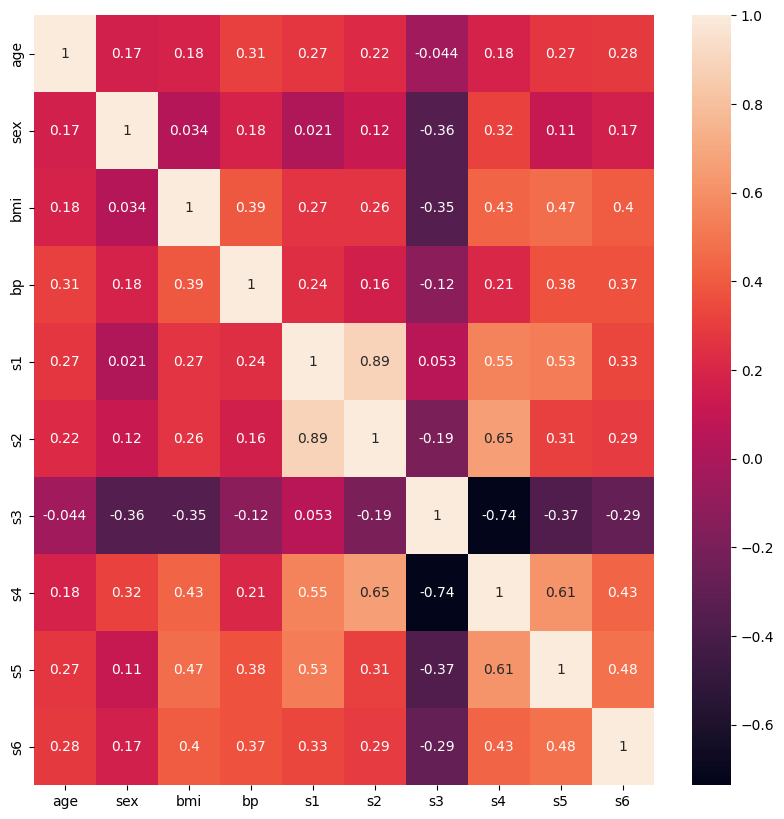

In [ ]:
import seaborn as sns   # visualization library built on matplotlib
import matplotlib.pyplot as plt  # required for controlling the figure

plt.figure(figsize=(10,10))
# Creates a figure of size 10x10 inches for the heatmap

sns.heatmap(x_train.corr(), annot=True)
# x_train.corr() → calculates correlation matrix between columns of x_train
# annot=True → display the correlation values inside each cell


In [ ]:
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor(random_state=0)
regressor.fit(x_train,y_train)

DecisionTreeRegressor(random_state=0)

hyperparameter tuning


In [ ]:
param = {
    'criterion': ['squared_error','friedman_mse','absolute_error','poisson'],
    'splitter': ['best','random'],
    'max_depth': [1,2,3,4,5,6,7,8,9,10],
    'max_features':['auto','sqrt','log2']
}

In [ ]:
from sklearn.model_selection import GridSearchCV
regressor = DecisionTreeRegressor()
GridSearchCV(regressor,param_grid=param,cv=5,scoring='neg_mean_squared_error')

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error')

In [ ]:
import warnings
warnings.filterwarnings('ignore')

# Import required libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param = {
    "criterion": ["gini", "entropy", "log_loss"],
    "splitter": ["best", "random"],
    "max_depth": [2,3,4,5,6,7,8,9,10],
    "max_features": ["sqrt", "log2"]   # "auto" not valid for DecisionTreeClassifier
}

# Create base model
tree_model = DecisionTreeClassifier()

# Create GridSearchCV object
grid = GridSearchCV(
    estimator=tree_model,
    param_grid=param,
    cv=5,
    scoring="accuracy"
)

# Fit on training data
grid.fit(x_train, y_train)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'max_features': ['sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [ ]:
grid.best_params_

{'criterion': 'gini',
 'max_depth': 3,
 'max_features': 'log2',
 'splitter': 'random'}

In [ ]:
y_pred = grid.predict(x_test)

In [ ]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
print(r2_score(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))

-0.21361592750054448
67.49438202247191
6429.921348314607


In [ ]:
selectedmodel = DecisionTreeRegressor(criterion='freidman_mse',max_features='log2',splitter='random')


In [ ]:
# Get the best model
selectedmodel = grid.best_estimator_

# Fit (optional, already fitted inside GridSearchCV)
selectedmodel.fit(x_train, y_train)

# Predict
y_pred = selectedmodel.predict(x_test)

# Evaluate
from sklearn.metrics import accuracy_score
print("Test Accuracy:", accuracy_score(y_test, y_pred))


Test Accuracy: 0.0


[Text(0.5, 0.875, 'x[3] <= 0.002\ngini = 0.994\nsamples = 353\nvalue = [1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0, 1.0, 2.0, 1.0\n3.0, 1.0, 3.0, 2.0, 4.0, 1.0, 4.0, 1.0, 1.0, 4.0\n2.0, 1.0, 2.0, 2.0, 4.0, 2.0, 1.0, 2.0, 2.0, 1.0\n5.0, 3.0, 1.0, 2.0, 2.0, 3.0, 3.0, 1.0, 1.0, 2.0\n3.0, 2.0, 4.0, 1.0, 1.0, 4.0, 1.0, 2.0, 3.0, 2.0\n2.0, 1.0, 1.0, 2.0, 4.0, 1.0, 1.0, 2.0, 2.0, 2.0\n4.0, 1.0, 4.0, 1.0, 2.0, 2.0, 1.0, 2.0, 2.0, 2.0\n1.0, 2.0, 1.0, 1.0, 2.0, 1.0, 1.0, 2.0, 3.0, 2.0\n4.0, 2.0, 2.0, 1.0, 2.0, 2.0, 2.0, 3.0, 4.0, 2.0\n4.0, 1.0, 1.0, 1.0, 1.0, 4.0, 2.0, 2.0, 1.0, 2.0\n1.0, 2.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 2.0\n1.0, 2.0, 2.0, 1.0, 1.0, 5.0, 2.0, 1.0, 1.0, 3.0\n1.0, 3.0, 1.0, 1.0, 2.0, 1.0, 1.0, 2.0, 2.0, 3.0\n1.0, 5.0, 1.0, 2.0, 2.0, 1.0, 1.0, 1.0, 1.0, 2.0\n1.0, 1.0, 2.0, 1.0, 3.0, 1.0, 2.0, 1.0, 1.0, 1.0\n1.0, 2.0, 1.0, 1.0, 1.0, 2.0, 2.0, 1.0, 2.0, 2.0\n2.0, 1.0, 2.0, 1.0, 2.0, 2.0, 3.0, 1.0, 2.0, 1.0\n3.0, 2.0, 2.0, 1.0, 1.0, 1.0, 3.0, 1.0, 2.0, 1.0\n1.0, 3.0, 2.0, 1.0, 2.0, 1.0

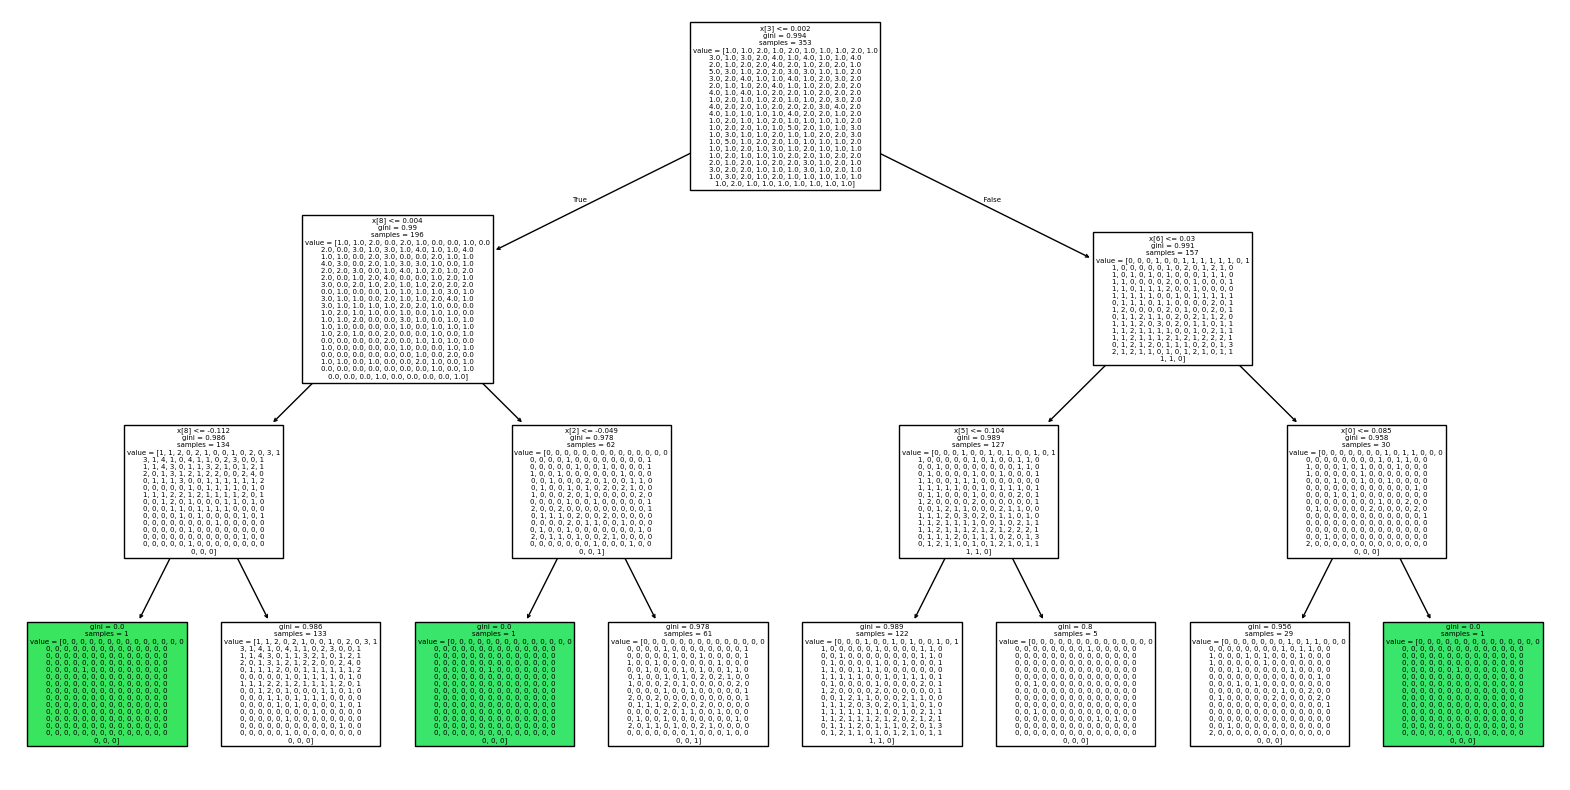

In [ ]:
#visualize the decision tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
from sklearn import tree
tree.plot_tree(selectedmodel,filled=True)